# "Brain Tumor Detection using CapNet Model" 

Capsule Networks (CapsNet) are a type of neural network architecture introduced by Geoffrey Hinton and his team. They aim to overcome some limitations of traditional convolutional neural networks (CNNs), such as the inability to encode spatial hierarchies explicitly. CapsNets use capsules, which are groups of neurons that output a vector rather than a scalar, to represent different properties of objects.

steps for proprocessing ,training evaluation an effective Deep Learning model for brain tumor detection. Here’s a general workflow you can follow:

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import EfficientNetB0
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Use mixed precision if available
try:
    from tensorflow.keras.mixed_precision import experimental as mixed_precision
    policy = mixed_precision.Policy('mixed_float16')
    mixed_precision.set_policy(policy)
except ImportError:
    pass


CapNet Model Definition

In [ ]:
# Define the Capsule Network model with EfficientNetB0
def CapsNetEfficientNetB0(input_shape, num_classes):
    base_model = EfficientNetB0(include_top=False, input_shape=input_shape, pooling='avg')
    base_model.trainable = True  # Unfreeze the base model for fine-tuning
    # Add more layers for increased model complexity
    x = base_model.output
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(num_classes, activation='softmax')(x)
    
    model = models.Model(inputs=base_model.input, outputs=output)
    return model
    

In [ ]:
# Set the number of classes
num_classes = 2  # 'Not Tumor' and 'Tumor'

In [ ]:

# Initialize improved CapsNet model with EfficientNetB0
capsnet_model_efficient = CapsNetEfficientNetB0(input_shape=(128, 128, 3), num_classes=num_classes)


Data Generator

In [ ]:

# Define data generators for training and validation with increased augmentation
train_datagen = ImageDataGenerator(
    rotation_range=30,         # Increased rotation range
    width_shift_range=0.2,     # Increased width shift range
    height_shift_range=0.2,    # Increased height shift range
    shear_range=0.2,           # Increased shear range
    zoom_range=0.2,            # Increased zoom range
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator()

Training Generator

In [ ]:

# Flow training images in batches using train_datagen generator
data_dir = 'Brain Tumor Data Set/'
train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=(128, 128),    # Resize images to 128x128 during loading
    batch_size=16,
    class_mode='sparse'        # Use 'sparse' for sparse_categorical_crossentropy loss
)

Validation Generator

In [ ]:
# Flow validation images in batches using val_datagen generator
val_generator = val_datagen.flow_from_directory(
    os.path.join(data_dir, 'validation'),
    target_size=(128, 128),
    batch_size=16,
    class_mode='sparse'
)

CapNet Model with class weights 

In [ ]:
# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}


In [ ]:

# Compile the improved CapsNet model with class weights
capsnet_model_efficient.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
                               loss='sparse_categorical_crossentropy',
                               metrics=['accuracy'])

Model Summary

In [ ]:
# Display model summary
capsnet_model_efficient.summary()

Training the model by adding Epoch

In [ ]:
# Train the improved CapsNet model with class weights and increased epochs
history_efficient = capsnet_model_efficient.fit(train_generator,
                                                epochs=10,                 # Increased number of epochs
                                                validation_data=val_generator,
                                                class_weight=class_weights_dict)

Evaluate the model

In [ ]:
# Evaluate the improved CapsNet model
val_loss_efficient, val_acc_efficient = capsnet_model_efficient.evaluate(val_generator, verbose=2)
print("\nImproved Validation Accuracy:", val_acc_efficient)


plot the Epoch 

In [ ]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_efficient.history['accuracy'], label='Training Accuracy')
plt.plot(history_efficient.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_efficient.history['loss'], label='Training Loss')
plt.plot(history_efficient.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Predictions making

In [ ]:
# Make predictions with the improved model
predictions_efficient = capsnet_model_efficient.predict(val_generator)
predicted_labels_efficient = np.argmax(predictions_efficient, axis=1)


Classification Report

In [ ]:

# Print classification report for improved model
print("\nImproved Classification Report:")
print(classification_report(val_generator.classes, predicted_labels_efficient, target_names=train_generator.class_indices))


# Plot the Confusion Matris

In [ ]:
# Plot confusion matrix for improved model
cm_efficient = confusion_matrix(val_generator.classes, predicted_labels_efficient)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_efficient, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices, yticklabels=train_generator.class_indices)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Improved Confusion Matrix')
plt.show()

# Save the CapNet Model in H5 format

Found 714 images belonging to 2 classes.
Found 714 images belonging to 2 classes.


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_4         │ (None, 128, 128,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 128, 128,  │          7 │ rescaling_4[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_5         │ (None, 128, 128,  │          0 │ normalization_2[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 129, 129,  │          0 │ rescaling_5[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 64, 64,    │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 64, 64,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 64, 64,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 64, 64,    │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 64, 64,    │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 64, 64,    │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 64, 64,    │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 64, 64,    │        512 │ block1a_se_excit

 Total params: 5,893,285 (22.48 MB)

 Trainable params: 5,848,190 (22.31 MB)

 Non-trainable params: 45,095 (176.16 KB)

Epoch 1/10


c:\Users\Pro\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.5660 - loss: 1.0878 - val_accuracy: 0.6289 - val_loss: 0.6270
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7256 - loss: 0.7042 - val_accuracy: 0.6148 - val_loss: 0.6179
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.7848 - loss: 0.5791 - val_accuracy: 0.6723 - val_loss: 0.5858
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.8286 - loss: 0.4342 - val_accuracy: 0.7661 - val_loss: 0.4681
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.8616 - loss: 0.3383 - val_accuracy: 0.8137 - val_loss: 0.4051
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.8789 - loss: 0.3384 - val_accuracy: 0.8782 - val_loss: 0.3004
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.8871 - loss: 0.3420 - val_accuracy: 0.9062 - val_loss: 0.2131
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.8931 - loss: 0.2747 - val_accuracy: 0.8964 - val_loss: 0.2279
Epo

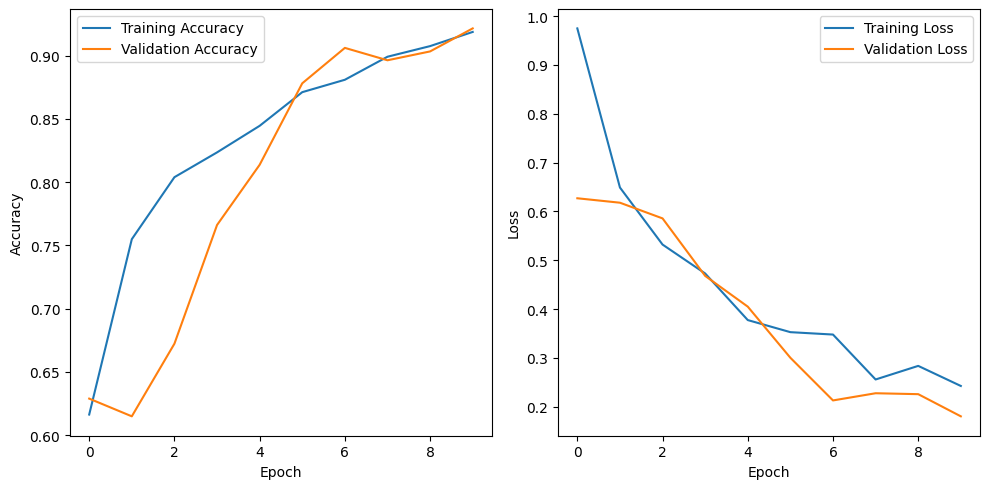

45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 216ms/step

Improved Classification Report:
              precision    recall  f1-score   support

   Not Tumor       0.48      0.55      0.51       340
       Tumor       0.52      0.45      0.49       374

    accuracy                           0.50       714
   macro avg       0.50      0.50      0.50       714
weighted avg       0.50      0.50      0.50       714



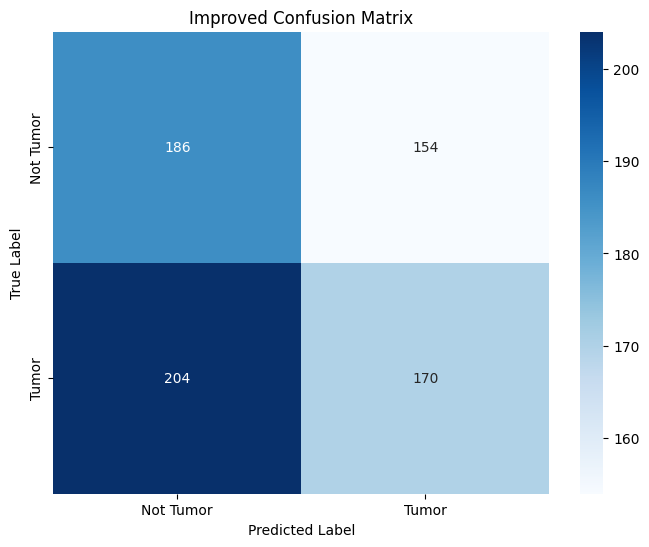

In [3]:
# Save the improved CapsNet model
capsnet_model_efficient.save('CapsnetEfficientNet_Model_Brain_Tumor_Detection_Improved.h5')